In [197]:
library(RYandexTranslate)
library(devtools)
library(quantmod)
library(xts)
library(readxl) # подгружаем необходимые библиотеки 

Warning message:
"package 'quantmod' was built under R version 3.6.3"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.



In [215]:
to_xts <- function(df, ...){ # для перевода фрейма во временной ряд 
    df <- as.data.frame(df)  
    #df$date = as.Date(df$date)
    ts = xts(df[,-1], order.by = df[,1])
    return(ts) 
}

In [217]:
api_key = 'trnsl.1.1.20200403T171846Z.bba318a81de9cffa.5d61da86a929bbff2bce90911ade676bc6bdfafd' # Yandex API ключ

In [216]:
translate = function (api_key, text = "", lang = "") # функция для языкового перевода с помощью API
{
  url = "https://translate.yandex.net/api/v1.5/tr.json/translate?"
  url = paste(url, "key=", api_key, sep = "")
  if (text != "") {
    url = paste(url, "&text=", text, sep = "")
  }
  if (lang != "") {
    url = paste(url, "&lang=", lang, sep = "")
  }
  url = gsub(pattern = " ", replacement = "%20", x = url)
  d = RCurl::getURL(url, ssl.verifyhost = 0L, ssl.verifypeer = 0L)
  d = jsonlite::fromJSON(d)
  d$code = NULL
  d
}  

In [230]:
normalize <- function(x) { # функция нормирования данных
return ((x - min(x)) / (max(x) - min(x)))
}

In [8]:
broendby <- read_xls('C:/Users/Митя/ВКР/broendby.xls') # выкаченные твиты с помощью модуля twitterscraper в Python

New names:
* `` -> ...1



In [5]:
broendby # массив данных

...1,screen_name,username,user_id,tweet_id,tweet_url,timestamp,time,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,...,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
105,CrackBaby1312,Thomsen,789444522,1079893892718305280,/CrackBaby1312/status/1079893892718305280,2019-01-01,0:15:42,"Hellere det end fulde, nordede Brondby-fans i nedtakten til en kamp.","<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""da"">Hellere det end fulde, nordede <strong>Brondby</strong>-fans i nedtakten til en kamp. <img alt=""<U+0001F603>"" aria-label=""Emoji: Улыбающееся лицо с открытым ртом"" class=""Emoji Emoji--forText"" draggable=""false"" src=""https://abs.twimg.com/emoji/v2/72x72/1f603.png"" title=""Улыбающееся лицо с открытым ртом""/></p>",...,FALSE,[],NA,1,0,2,TRUE,TRUE,1079893678087458816,"[{'screen_name': 'Hartwich81', 'user_id': '1663086960'}]"
104,linnebjerg,David Linnebjerg,390137942,1079894375394668545,/linnebjerg/status/1079894375394668545,2019-01-01,0:17:37,"Det er sa fucking typisk, jer skide kr<U+00E6>nkende BRONDBY fans at have den holdning.. Og hvor er det egentlig PISSE tarveligt, at et kanonslag SKAL have samme form som et erigeret lem dit mandesvin...","<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""da"">Det er sa fucking typisk, jer skide kr<U+00E6>nkende <strong>BRONDBY</strong> fans at have den holdning.. Og hvor er det egentlig PISSE tarveligt, at et kanonslag SKAL have samme form som et erigeret lem dit mandesvin...</p>",...,FALSE,[],NA,10,0,0,FALSE,TRUE,1079851479316471809,"[{'screen_name': 'CrackBaby1312', 'user_id': '789444522'}]"
103,unknownndane,Daniel,108314101,1079894523726254080,/unknownndane/status/1079894523726254080,2019-01-01,0:18:12,"Na, hvem bliver sa pr<U+00E6>senteret hos @BrondbyIF pa Ebbes forste dag? Han kan vel godt underskrive papir bagstiv #brondby","<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""da"">Na, hvem bliver sa pr<U+00E6>senteret hos <a class=""twitter-atreply pretty-link js-nav"" data-mentioned-user-id=""27618169"" dir=""ltr"" href=""/BrondbyIF""><s>@</s><b>BrondbyIF</b></a> pa Ebbes forste dag? Han kan vel godt underskrive papir bagstiv <img alt=""<U+0001F440>"" aria-label=""Emoji: Глаза"" class=""Emoji Emoji--forText"" draggable=""false"" src=""https://abs.twimg.com/emoji/v2/72x72/1f440.png"" title=""Глаза""/> <a class=""twitter-hashtag pretty-link js-nav"" data-query-source=""hashtag_click"" dir=""ltr"" href=""/hashtag/br%C3%B8ndby?src=hash""><s>#</s><b><strong>brondby</strong></b></a></p>",...,FALSE,[],NA,8,0,0,FALSE,FALSE,NA,[]
102,thomasasj,Thomas Jensen,101218251,1079903976034844673,/thomasasj/status/1079903976034844673,2019-01-01,0:55:46,Eller have hjulpet Brondby med deres underskud,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""da"">Eller have hjulpet <strong>Brondby</strong> med deres underskud</p>",...,FALSE,[],NA,0,0,0,FALSE,TRUE,1079881347349577734,"[{'screen_name': 'CrackBaby1312', 'user_id': '789444522'}]"
101,SorenRen,Soren Pedersen,2589279147,1079915807004549120,/SorenRen/status/1079915807004549120,2019-01-01,1:42:46,Brondby henter tr<U+00E6>ner i 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division …,"<p class=""TweetTextSize js-tweet-text tweet-text"" data-aria-label-part=""0"" lang=""da""><strong>Brondby</strong> henter tr<U+00E6>ner i 1. division <a class=""twitter-timeline-link"" data-expanded-url=""https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division"" dir=""ltr"" href=""https://t.co/oSelpmbEGm"" rel=""nofollow noopener"" target=""_blank"" title=""https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division""><span class=""tco-ellipsis""></span><span class=""invisible"">https://www.</span><span class=""js-display-url"">bt.dk/fodbol

In [64]:
ncol(broendby)

[1] 22

In [31]:
tweets <- cbind(broendby$timestamp, broendby$text, broendby$likes, broendby$retweets) # оставляет только эти столбики

In [32]:
class(tweets)

[1] "matrix"

In [33]:
tweets <- as.data.frame(tweets) # Переводим матрицу для удобства в дата фрейм 

In [34]:
colnames(tweets) <- c('Date', 'Text', 'Likes', 'Retweets') # дает удобные названия переменным

In [38]:
tweets$Date <- as.vector(as.character(broendby$timestamp)) # переводим дату в читаемый формат 

In [39]:
tweets

Date,Text,Likes,Retweets
<chr>,<fct>,<fct>,<fct>
2019-01-01,"Hellere det end fulde, nordede Brondby-fans i nedtakten til en kamp.",1,0
2019-01-01,"Det er sa fucking typisk, jer skide kr<U+00E6>nkende BRONDBY fans at have den holdning.. Og hvor er det egentlig PISSE tarveligt, at et kanonslag SKAL have samme form som et erigeret lem dit mandesvin...",10,0
2019-01-01,"Na, hvem bliver sa pr<U+00E6>senteret hos @BrondbyIF pa Ebbes forste dag? Han kan vel godt underskrive papir bagstiv #brondby",8,0
2019-01-01,Eller have hjulpet Brondby med deres underskud,0,0
2019-01-01,Brondby henter tr<U+00E6>ner i 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division …,0,0
2019-01-01,Ild i bil ved Ulsoparken i Brondby. #ildibil #brand #ulsoparken #brondby #politidkpic.twitter.com/AhAxL6ICRH,0,1
2019-01-01,Ild i bil ved Ulsoparken i Brondby strand. #ildibil #brand #brondby #hberedskab #politidkpic.twitter.com/YetrBmjqsM,0,0
2019-01-01,Brondbynyt: De sidste 12 timer har vi fundet 2 nyheder til dig. Find dem pa http://90minutter.dk #sldk #brondby,0,0
2019-01-01,- Lukke de sidste stadion pa Fyn - Fuld plade pa Brondby - U21 EM til juni - 2 nye lande - Og selvfolgelig sa at fa debut i Bundesliga bussen ;-) Godt nytar til alle,3,0


In [40]:
tweets$Date <- as.Date(tweets$Date)

In [41]:
tweets$Text <- as.character(tweets$Text)

In [44]:
tweets$Likes <- as.numeric(as.character(tweets$Likes))

In [45]:
tweets$Retweets <- as.numeric(as.character(tweets$Retweets)) # предаем нужный формат данным

In [46]:
nrow(tweets)

[1] 2691

In [47]:
tweets <- tweets[!duplicated(tweets), ] # удаляем дубликаты 

In [51]:
nrow(tweets) # оставили 2260 неповторяющихся твитов

[1] 2260

In [56]:
for (i in 1:nrow(tweets)) { # цикл для построчного перевода на английский 
    text = as.character(tweets$Text[i])
    try(
    data <- translate(api_key, text = text, lang="en"))
    if (is.null(data$text) != 1) {
    tweets$Text[i] <- data$text
        }
} 

Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found in URL
Error in function (type, msg, asError = TRUE)  : 
  Illegal characters found

In [60]:
head(tweets) 

,Date,Text,Likes,Retweets
,<date>,<chr>,<dbl>,<dbl>
1,2019-01-01,"Better that than full, geeky Brondby-fans in nedtakten to a fight.",NA,0
2,2019-01-01,"It is so fucking typical, you fucking offensive BRONDBY fans that have the attitude.. And where are the really PISS poor, that a firecracker MUST have the same shape as an erect limb your mandesvin...",NA,0
3,2019-01-01,"Na, hvem bliver sa pr<U+00E6>senteret hos @BrondbyIF pa Ebbes forste dag? Han kan vel godt underskrive papir bagstiv #brondby",NA,0
4,2019-01-01,Or have helped Brondby with their deficit,NA,0
5,2019-01-01,Brondby download trainer in 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division ...,NA,0
6,2019-01-01,Brondby download trainer in 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division ...,NA,1


In [86]:
score.sentiment <- function(sentences, pos.words, neg.words, .progress='none') # функция для подсчета сентимента
 {
 require(plyr) 
 require(stringr)
 scores <- laply(sentences, function(sentence, pos.words, neg.words){
 sentence <- gsub('[[:punct:]]', "", sentence)
 sentence <- gsub('[[:cntrl:]]', "", sentence)
 sentence <- gsub('\\d+', "", sentence)
 sentence <- tolower(sentence)
 word.list <- str_split(sentence, '\\s+')
 words <- unlist(word.list)
 pos.matches <- match(words, pos.words)
 neg.matches <- match(words, neg.words)
 pos.matches <- !is.na(pos.matches)
 neg.matches <- !is.na(neg.matches)
 score <- sum(pos.matches) - sum(neg.matches)
 return(score)
 }, pos.words, neg.words, .progress=.progress)
 scores.df <- data.frame(score=scores, text=sentences)
 return(scores.df)
 }

In [87]:
pos <- scan('C:/Users/Митя/Desktop/positive.txt', what='character', comment.char=';') # набор положительных слов
neg <- scan('C:/Users/Митя/Desktop/negative.txt', what='character', comment.char=';') # набор негативных слов

In [88]:
pos.words <- pos # для добавления контекстуального сенимента можно использовать pos.words <- rbind(pos, '...')
neg.words <- neg

In [90]:
tweets$Text <- as.factor(tweets$Text) # преобразовываем в факторную переменную

In [131]:
scores <- score.sentiment(tweets$Text, pos.words, neg.words, .progress='text')

  |======================================================================| 100%


In [132]:
scores # получили оценку, означаюю разницу между количеством позитивных и негативных слов

score,text
<int>,<fct>
2,"Better that than full, geeky Brondby-fans in nedtakten to a fight."
-3,"It is so fucking typical, you fucking offensive BRONDBY fans that have the attitude.. And where are the really PISS poor, that a firecracker MUST have the same shape as an erect limb your mandesvin..."
0,"Na, hvem bliver sa pr<U+00E6>senteret hos @BrondbyIF pa Ebbes forste dag? Han kan vel godt underskrive papir bagstiv #brondby"
1,Or have helped Brondby with their deficit
0,Brondby download trainer in 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division ...
0,Brondby download trainer in 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division ...
0,Brondby download trainer in 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division ...
0,Brondbynyt: De sidste 12 timer har vi fundet 2 nyheder til dig. Find dem pa http://90minutter.dk #sldk #brondby
0,- Lukke de sidste stadion pa Fyn - Fuld plade pa Brondby - U21 EM til juni - 2 nye lande - Og selvfolgelig sa at fa debut i Bundesliga bussen ;-) Godt nytar til alle


In [133]:
scores$pos <- integer(length = nrow(scores))
scores$neut <- integer(length = nrow(scores))
scores$neg <- integer(length = nrow(scores))
for (i in 1:nrow(scores)) {
    if (scores$score[i] > 0) { # создаем для каждого типо твитов отдельные бинарные переменные 
    scores$pos[i] <- 1
} else if (scores$score[i] == 0){
    scores$neut[i] <- 1
} else if (scores$score[i] < 0){
    scores$neg[i] <- 1
}
    }

In [134]:
scores

score,text,pos,neut,neg
<int>,<fct>,<dbl>,<dbl>,<dbl>
2,"Better that than full, geeky Brondby-fans in nedtakten to a fight.",1,0,0
-3,"It is so fucking typical, you fucking offensive BRONDBY fans that have the attitude.. And where are the really PISS poor, that a firecracker MUST have the same shape as an erect limb your mandesvin...",0,0,1
0,"Na, hvem bliver sa pr<U+00E6>senteret hos @BrondbyIF pa Ebbes forste dag? Han kan vel godt underskrive papir bagstiv #brondby",0,1,0
1,Or have helped Brondby with their deficit,1,0,0
0,Brondby download trainer in 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division ...,0,1,0
0,Brondby download trainer in 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division ...,0,1,0
0,Brondby download trainer in 1. division https://www.bt.dk/fodbold/broendby-henter-traener-i-1.-division ...,0,1,0
0,Brondbynyt: De sidste 12 timer har vi fundet 2 nyheder til dig. Find dem pa http://90minutter.dk #sldk #brondby,0,1,0
0,- Lukke de sidste stadion pa Fyn - Fuld plade pa Brondby - U21 EM til juni - 2 nye lande - Og selvfolgelig sa at fa debut i Bundesliga bussen ;-) Godt nytar til alle,0,1,0


In [186]:
for_metrics <- cbind(as.character(tweets$Date), scores$score, scores$pos, scores$neut, scores$neg)

In [187]:
for_metrics <- as.data.frame(for_metrics)

In [188]:
colnames(for_metrics) <- c('Date', 'Score', 'Positive', 'Neutral', 'Negative')

In [189]:
for_metrics$Date <- as.Date(for_metrics$Date)
for (i in 2:ncol(for_metrics)){
    for_metrics[,i] <- as.numeric(as.character(for_metrics[,i]))
}

In [190]:
head(for_metrics)

,Date,Score,Positive,Neutral,Negative
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-01-01,2,1,0,0
2,2019-01-01,-3,0,0,1
3,2019-01-01,0,0,1,0
4,2019-01-01,1,1,0,0
5,2019-01-01,0,0,1,0
6,2019-01-01,0,0,1,0


In [191]:
# for_metrics <- aggregate(Score ~ Date, for_metrics, sum) # группируем наши данные по дням

In [192]:
for_metrics <- aggregate(cbind(Score, Positive, Neutral, Negative) ~ Date, for_metrics, sum)

In [193]:
for_metrics

Date,Score,Positive,Neutral,Negative
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2019-01-01,14,11,20,4
2019-01-02,10,9,29,3
2019-01-03,26,24,38,8
2019-01-04,10,21,60,19
2019-01-05,26,27,52,13
2019-01-06,13,19,38,11
2019-01-07,44,25,25,6
2019-01-08,18,22,30,15
2019-01-09,8,10,60,4


In [198]:
for_metrics <- to_xts(for_metrics)

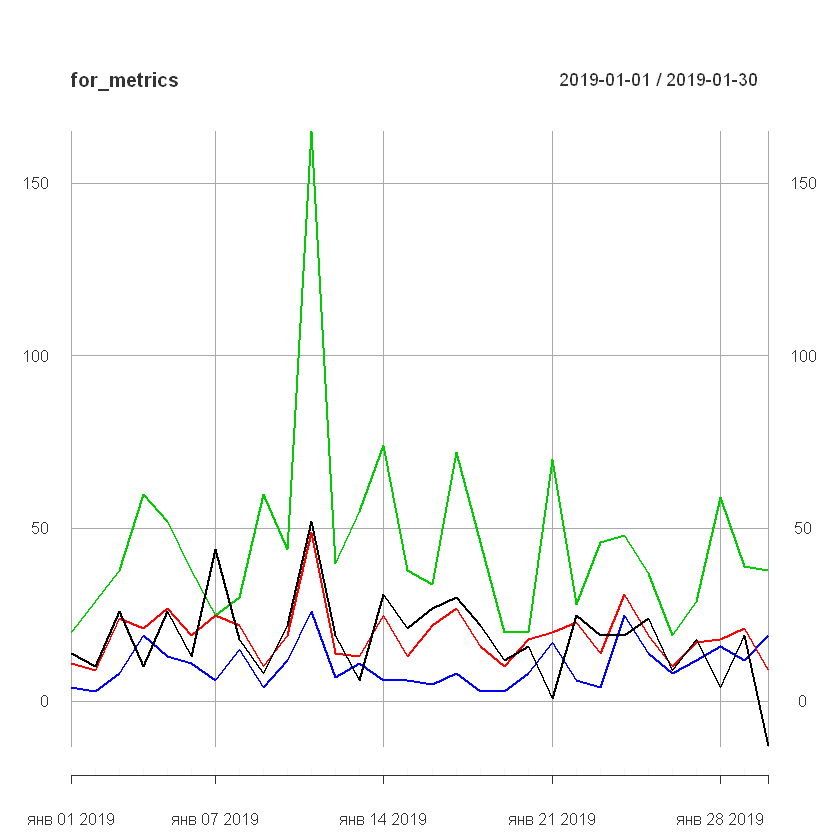

In [200]:
plot(for_metrics)

In [201]:
getSymbols('BIF.CO', src = 'yahoo') # качаем серию

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "BIF.CO"

In [202]:
BIF.CO$BIF.CO.Close['2019-01-01::2019-01-30'] # оставляет данные только за определенный временной промежуток

           BIF.CO.Close
2019-01-02     0.725656
2019-01-03     0.718471
2019-01-04     0.718471
2019-01-07     0.729248
2019-01-08     0.729248
2019-01-09     0.766968
2019-01-10     0.784930
2019-01-11     0.786726
2019-01-14     0.777745
2019-01-15     0.761579
2019-01-16     0.779541
2019-01-17     0.759783
2019-01-18     0.766968
2019-01-21     0.766968
2019-01-22     0.766968
2019-01-23     0.777745
2019-01-24     0.766968
2019-01-25     0.770560
2019-01-28     0.754395
2019-01-29     0.754395
2019-01-30     0.763375

In [203]:
for_plot <- merge(BIF.CO$BIF.CO.Close['2019-01-01::2019-01-30'], for_metrics)

In [206]:
head(for_plot)

           BIF.CO.Close Score Positive Neutral Negative
2019-01-01           NA    14       11      20        4
2019-01-02     0.725656    10        9      29        3
2019-01-03     0.718471    26       24      38        8
2019-01-04     0.718471    10       21      60       19
2019-01-05           NA    26       27      52       13
2019-01-06           NA    13       19      38       11

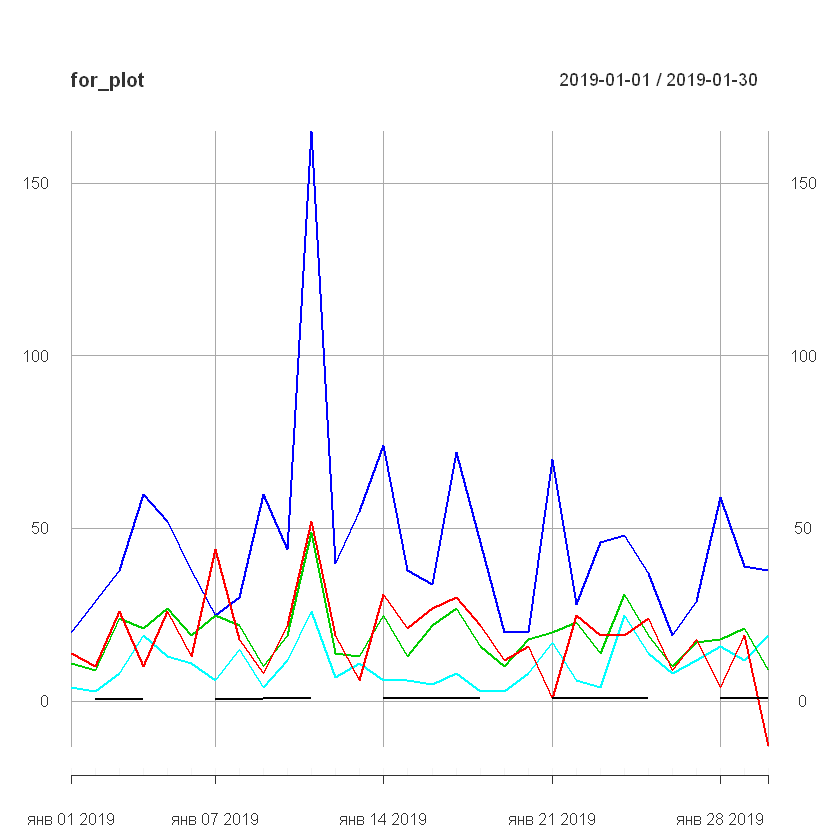

In [222]:
plot(for_plot) # Понял, что облажался :D

In [245]:
prelim <- as.data.frame(for_plot)

In [246]:
for (i in 1:ncol(prelim)) {
    prelim[,i] <- scale(prelim[,i])
}

In [267]:
compl <- prelim[complete.cases(prelim),]

In [270]:
compl <- as.ts(compl)

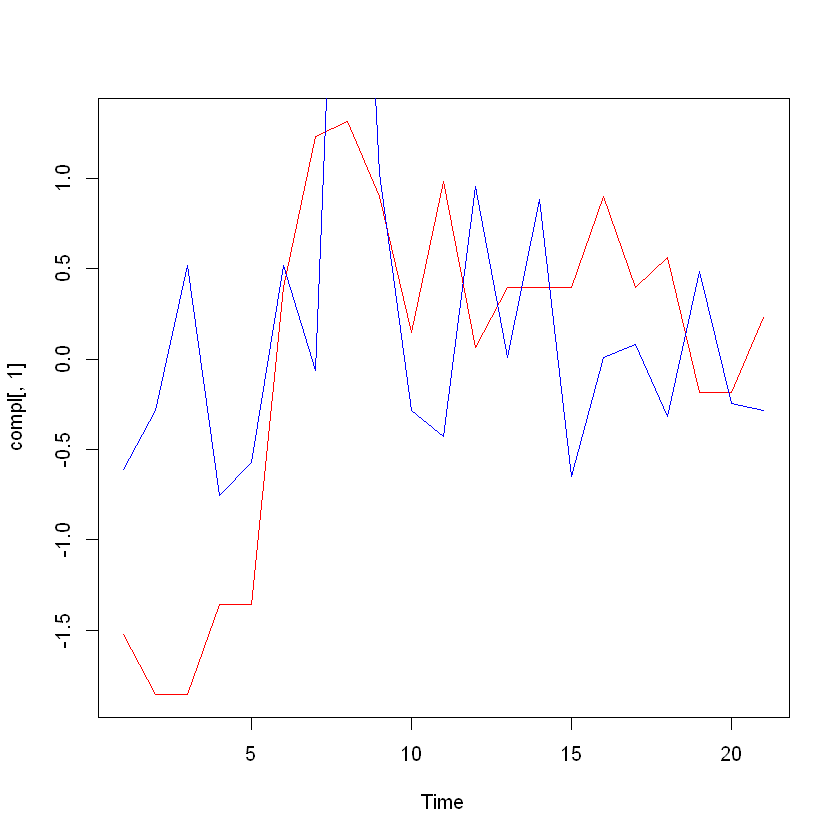

In [277]:
plot(compl[,1], col = 'red')
lines(compl[,4], col = 'blue') # надо крутить и думать 

In [275]:
cor(compl)

,BIF.CO.Close,Score,Positive,Neutral,Negative
BIF.CO.Close,1.00000000,0.1481003,0.1856757,0.3903882,0.07047281
Score,0.14810031,1.0000000,0.7304986,0.3662877,-0.10241641
Positive,0.18567567,0.7304986,1.0000000,0.6945756,0.52785249
Neutral,0.39038822,0.3662877,0.6945756,1.0000000,0.49307969
Negative,0.07047281,-0.1024164,0.5278525,0.4930797,1.00000000


In [287]:
cop <- read_xlsx('C:/Users/Митя/cop.xlsx') # биржа Копенгагена (можно было скачать и через getSymbols)

In [280]:
head(cop)

Date,High,Low,Close
<dttm>,<chr>,<chr>,<chr>
2019-01-02,1008.48,988.94,1004.76
2019-01-03,1003.54,990.87,995.37
2019-01-04,1020.17,996.57,1020.17
2019-01-07,1029.93,1013.67,1027.82
2019-01-08,1044.59,1026.74,1037.40
2019-01-09,1056.80,1038.73,1044.04


In [281]:
cop <- as.data.frame(cop)

In [282]:
cop$Date <- as.Date(cop$Date)

In [283]:
cop$High <- as.numeric(cop$High)
cop$Low <- as.numeric(cop$Low)
cop$Close <- as.numeric(cop$Close)

In [284]:
cop <- to_xts(cop)

In [285]:
# будем убирать линию тренда биржи из акций нашей 